# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("hasil_clustering.csv")
df

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,0
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,2
...,...,...,...,...,...,...,...,...,...,...
2277,856.21,33.0,109.0,1.0,12690.79,Credit,Colorado Springs,Branch,Doctor,2
2278,251.54,48.0,177.0,1.0,254.75,Debit,Tucson,Branch,Doctor,0
2279,28.63,56.0,146.0,1.0,3382.91,Debit,San Diego,Branch,Retired,0
2280,185.97,23.0,19.0,1.0,1776.91,Debit,Denver,Online,Student,1


In [3]:
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])
df

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,0
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,0
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,1
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,1
4,13.45,26.0,198.0,1.0,7429.40,0,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...
2277,856.21,33.0,109.0,1.0,12690.79,0,7,1,0,2
2278,251.54,48.0,177.0,1.0,254.75,1,40,1,0,0
2279,28.63,56.0,146.0,1.0,3382.91,1,36,1,2,0
2280,185.97,23.0,19.0,1.0,1776.91,1,10,2,3,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
y = df["Cluster"]
X = df.drop(columns=["Cluster"])

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
0,0.015317,0.838710,0.244828,0.0,0.336832,1.0,0.857143,0.0,0.000000
1,0.416400,0.806452,0.451724,0.0,0.918055,1.0,0.357143,0.0,0.000000
2,0.139579,0.016129,0.158621,0.0,0.068637,1.0,0.547619,1.0,1.000000
3,0.204047,0.129032,0.051724,0.0,0.569198,1.0,0.785714,1.0,1.000000
4,0.014608,0.129032,0.648276,0.0,0.492591,0.0,0.023810,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
2277,0.947969,0.241935,0.341379,0.0,0.846257,0.0,0.166667,0.5,0.000000
2278,0.278294,0.483871,0.575862,0.0,0.010318,1.0,0.952381,0.5,0.000000
2279,0.031420,0.612903,0.468966,0.0,0.220590,1.0,0.857143,0.5,0.666667
2280,0.205675,0.080645,0.031034,0.0,0.112636,1.0,0.238095,1.0,1.000000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1825, 9)
(457, 9)
(1825,)
(457,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [23]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Classification Report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       0.99      0.99      0.99       105
           2       1.00      1.00      1.00        94

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



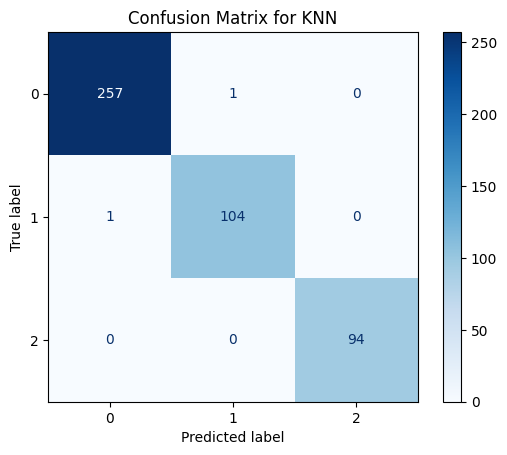

In [37]:
y_pred = knn_model.predict(X_test)
print("Classification Report KNN:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        94

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



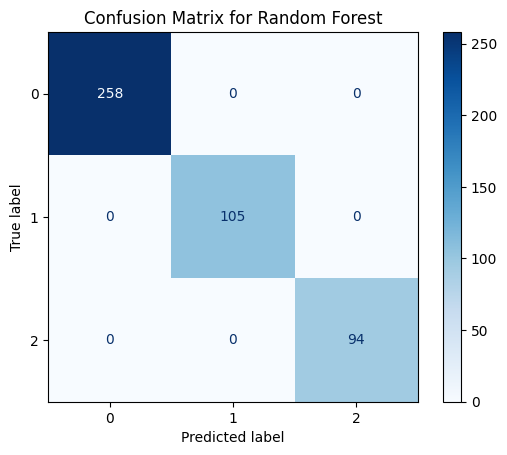

In [35]:
y_pred = rf_model.predict(X_test)
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       258
           1       0.98      1.00      0.99       105
           2       1.00      0.99      0.99        94

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457



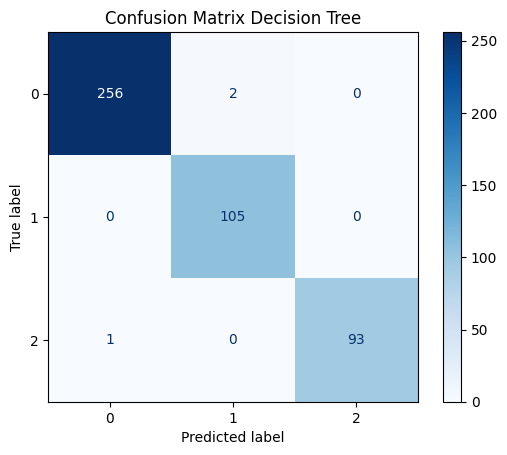

In [34]:
y_pred = dt_model.predict(X_test)
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Decision Tree")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
# Tidak dilakukan hyperparameter tuning karena dirasa model sudah cukup baik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [11]:
# Tidak dilakukan hyperparameter tuning karena dirasa model sudah cukup baik

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**REKOMENDASI**\
Rekomendasi 
tindakan lanjutan yang dapat dilakukan ialah menambah data tambahan atau menggunakan real-world dataset agar dapat menambah jumlah data dan juga dapat meningkatkan kompleksitas pada data.